# **Elbow Method In K-means algorithm**
* K-means algorithm is used in unsupervised learning where model have to work on its own to discover information.

* K-means algorithm uses clustering in this method of identifying similar groups of data in a data set is called clustering.Its basically allows you to automatically split the data into groups according to similarities.

* Clusters can be decided randomly or we can use Elbow Method which can provide optimal number of clusters.

* This is the most optimal method to make our model more close to accuracy.

* The graph plotted looks like an elbow of human which is why it is known as Elbow method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Dataset**
* I have taken my self created dataset into account to make the concept understand easily. In this folllowing dataset there are two features x1 and x2.
* We will see how to find optimal number of clusters for this dataset by using Elbow method


In [2]:
df=pd.DataFrame({ 'x1':[12,20,28,18,29,33,24,45,43,51,52,55,53,54,61,64,69,52,6,62,45,60,59,8], 
                 'x2':[39,36,30,52,54,46,55,59,63,70,66,63,58,14,8,19,7,24,77,65,80,4,72,45]})

In [3]:
# Printing first five rows
df.head()

,x1,x2
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


In [4]:
# Printing last five rows
df.tail()

,x1,x2
19,62,65
20,45,80
21,60,4
22,59,72
23,8,45


In [3]:
df.shape

(24, 2)

In [4]:
df.isnull().sum()

x1    0
x2    0
dtype: int64

In [5]:
# Printing concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      24 non-null     int64
 1   x2      24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [6]:
# Printing some basic statistical details like percentile, mean, std etc
df.describe()

,x1,x2
count,24.000000,24.000000
mean,41.791667,46.083333
std,19.226294,23.381369
min,6.000000,4.000000
25%,27.000000,28.500000
50%,48.000000,53.000000
75%,56.000000,63.500000
max,69.000000,80.000000


## **Elbow Method(To choose optimal no. of clusters)**

In [7]:
from sklearn.cluster import KMeans

In [9]:
x=df
wss = []
cluster_range = range(1,10)
for k in cluster_range:
  km = KMeans(n_clusters=k)
  km.fit(x)
  inertia = km.inertia_
  wss.append(inertia)

  print(wss)


[21075.791666666668]
[21075.791666666668, 9490.055555555555]
[21075.791666666668, 9490.055555555555, 3456.0]
[21075.791666666668, 9490.055555555555, 3456.0, 2310.7638888888887]
[21075.791666666668, 9490.055555555555, 3456.0, 2310.7638888888887, 1742.638888888889]
[21075.791666666668, 9490.055555555555, 3456.0, 2310.7638888888887, 1742.638888888889, 1435.3055555555557]
[21075.791666666668, 9490.055555555555, 3456.0, 2310.7638888888887, 1742.638888888889, 1435.3055555555557, 1226.0499999999997]
[21075.791666666668, 9490.055555555555, 3456.0, 2310.7638888888887, 1742.638888888889, 1435.3055555555557, 1226.0499999999997, 886.0833333333334]
[21075.791666666668, 9490.055555555555, 3456.0, 2310.7638888888887, 1742.638888888889, 1435.3055555555557, 1226.0499999999997, 886.0833333333334, 704.4166666666666]


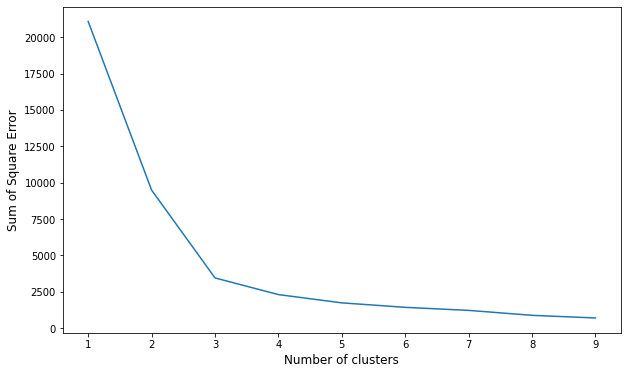

In [25]:
plt.figure(figsize=(10,6))
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('Sum of Square Error', fontsize=12)
plt.plot(cluster_range,wss)

**From the above plot we can see 3 is the optimal number of clusters for this dataset**

In [15]:
km= KMeans(n_clusters=3)    # no. of clusters determined by Elbow Method
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
km.cluster_centers_        # Centeroids

array([[19.77777778, 48.22222222],
       [51.66666667, 66.22222222],
       [60.        , 12.66666667]])

In [18]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2,
       1, 0], dtype=int32)

In [20]:
df['predicted labels']=km.labels_
df

,x1,x2,predicted labels
0,12,39,0
1,20,36,0
2,28,30,0
3,18,52,0
4,29,54,0
5,33,46,0
6,24,55,0
7,45,59,1
8,43,63,1
9,51,70,1


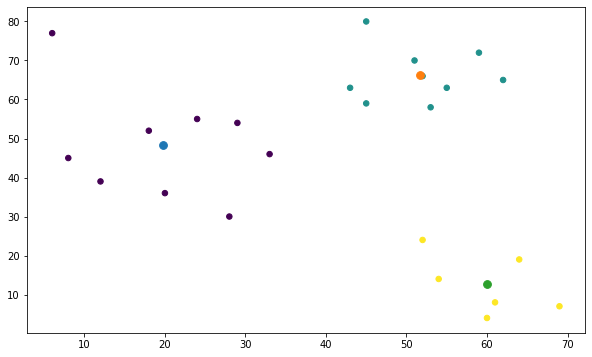

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df['x1'],df['x2'],30,km.labels_)
for i in km.cluster_centers_:
  plt.scatter(i[0],i[1],60,marker='o')
plt.show()